Starting...











  0%|                                                 | 0/3375 [00:00<?, ?it/s]

(10, 30)
Checking gradient...
Checking gradient...
Checking gradient...











  0%|                                      | 1/3375 [00:50<47:29:43, 50.68s/it]








  2%|▉                                    | 83/3375 [00:50<32:26:20, 35.47s/it]








  5%|█▉                                  | 178/3375 [00:50<22:03:08, 24.83s/it]








  8%|██▊                                 | 267/3375 [00:50<15:00:26, 17.38s/it]








 10%|███▌                                | 338/3375 [00:51<10:16:01, 12.17s/it]








 13%|████▊                                | 434/3375 [00:51<6:57:35,  8.52s/it]








 16%|█████▊                               | 531/3375 [00:51<4:42:41,  5.96s/it]








 19%|██████▉                              | 628/3375 [00:51<3:11:08,  4.18s/it]








 21%|███████▊                             | 707/3375 [00:52<2:10:03,  2.92s/it]








 24%|████████▋                            | 798/3375 [00:52<1:27:56,  2.05s/it]








 26%|██████████▎                            | 894/3375 [00:52<59:16,  1.43s/it]








 29%|███████████▍      

 32%|███████████▉                         | 1086/3375 [00:03<00:20, 112.81it/s]








 35%|████████████▉                        | 1175/3375 [00:03<00:14, 152.78it/s]








 38%|█████████████▉                       | 1266/3375 [00:03<00:10, 203.48it/s]








 40%|██████████████▊                      | 1349/3375 [00:04<00:11, 178.44it/s]








 43%|███████████████▋                     | 1435/3375 [00:04<00:08, 233.92it/s]








 45%|████████████████▋                    | 1526/3375 [00:04<00:06, 300.73it/s]








 48%|█████████████████▋                   | 1617/3375 [00:04<00:04, 375.87it/s]








 50%|██████████████████▌                  | 1695/3375 [00:05<00:06, 247.89it/s]








 53%|███████████████████▌                 | 1785/3375 [00:05<00:05, 316.42it/s]








 55%|████████████████████▌                | 1872/3375 [00:05<00:03, 390.05it/s]








 58%|█████████████████████▌               | 1962/3375 [00:05<00:03, 469.23it/s]








 60%|██████████████████████▎    

 60%|██████████████████████▎              | 2030/3375 [00:05<00:05, 255.91it/s]








 63%|███████████████████████▎             | 2123/3375 [00:05<00:03, 326.35it/s]








 66%|████████████████████████▏            | 2211/3375 [00:05<00:02, 401.76it/s]








 68%|█████████████████████████▎           | 2304/3375 [00:06<00:02, 483.57it/s]








 71%|██████████████████████████▏          | 2384/3375 [00:06<00:03, 268.36it/s]








 73%|███████████████████████████          | 2469/3375 [00:06<00:02, 337.31it/s]








 76%|████████████████████████████         | 2563/3375 [00:06<00:01, 416.56it/s]








 79%|█████████████████████████████        | 2653/3375 [00:06<00:01, 495.81it/s]








 81%|█████████████████████████████▉       | 2732/3375 [00:07<00:02, 278.82it/s]








 84%|██████████████████████████████▉      | 2826/3375 [00:07<00:01, 353.01it/s]








 86%|███████████████████████████████▉     | 2915/3375 [00:07<00:01, 430.45it/s]








 89%|███████████████████████████

[0.03572170129635064, 0.03554890990521828, 0.035618592294704224, 0.03547216216925867]
[0.8886666666666667, 0.8883333333333333, 0.8908333333333334, 0.8878333333333334, 0.8905, 0.8918333333333334, 0.8913333333333333, 0.8941666666666667, 0.891, 0.8916666666666667]


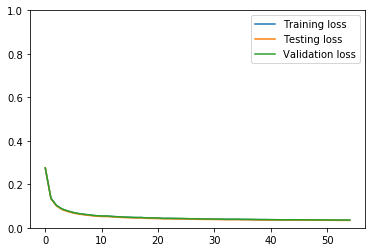

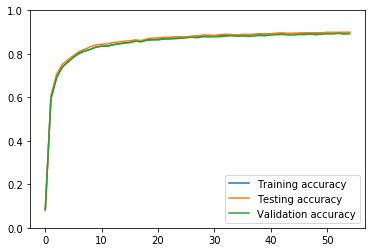

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
import tqdm

#mnist.init()
def should_early_stop(validation_loss, num_steps=4):
    if len(validation_loss) < num_steps+1:
        return False

    is_increasing = [validation_loss[i] <= validation_loss[i+1] for i in range(-num_steps-1, -1)]
    return sum(is_increasing) == len(is_increasing)

def train_val_split(X, Y, val_percentage):
  """
    Selects samples from the dataset randomly to be in the validation set. Also, shuffles the train set.
    --
    X: [N, num_features] numpy vector,
    Y: [N, 1] numpy vector
    val_percentage: amount of data to put in validation set
  """
  dataset_size = X.shape[0]
  idx = np.arange(0, dataset_size)
  np.random.shuffle(idx)

  train_size = int(dataset_size*(1-val_percentage))
  idx_train = idx[:train_size]
  idx_val = idx[train_size:]
  X_train, Y_train = X[idx_train], Y[idx_train]
  X_val, Y_val = X[idx_val], Y[idx_val]
  return X_train, Y_train, X_val, Y_val
v_ji=0
def onehot_encode(Y, n_classes=10):
    onehot = np.zeros((Y.shape[0], n_classes))
    onehot[np.arange(0, Y.shape[0]), Y] = 1
    return onehot

def bias_trick(X):
    return np.concatenate((X, np.ones((len(X), 1))), axis=1)

def check_gradient_hidden(X, targets,weights, w_ji, w_kj, epsilon, computed_gradient):
    print("Checking gradient...")
    dw = np.zeros_like(w_ji)
    for k in range(w_ji.shape[0]):
        for j in range(w_ji.shape[1]):
            new_weight1, new_weight2 = np.copy(w_ji), np.copy(w_ji)
            new_weight1[k,j] += epsilon
            new_weight2[k,j] -= epsilon
            [_,output1] = feedforward_improved(X, weights)
            [_,output2] = feedforward_improved(X, weights)
            loss1 = cross_entropy_loss(output1, targets)
            loss2 = cross_entropy_loss(output2, targets)
            dw[k,j] = (loss1 - loss2) / (2*epsilon)
    maximum_aboslute_difference = abs(computed_gradient-dw).max()
    if (maximum_aboslute_difference > epsilon**2):
        print(computed_gradient-dw)
    assert maximum_aboslute_difference <= epsilon**2, "Absolute error was: {}".format(maximum_aboslute_difference)

def check_gradient_output(X, targets, w_kj, epsilon, computed_gradient):
    print("Checking gradient...")
    dw = np.zeros_like(w_kj)
    for k in range(w_kj.shape[0]):
        for j in range(w_kj.shape[1]):
            new_weight1, new_weight2 = np.copy(w_kj), np.copy(w_kj)
            new_weight1[k,j] += epsilon
            new_weight2[k,j] -= epsilon
            output1 = forward_softmax(X, new_weight1)
            output2 = forward_softmax(X, new_weight2)
            loss1 = cross_entropy_loss(output1, targets)
            loss2 = cross_entropy_loss(output2, targets)
            dw[k,j] = (loss1 - loss2) / (2*epsilon)
    maximum_aboslute_difference = abs(computed_gradient-dw).max()
    if (maximum_aboslute_difference > epsilon**2):
        print(computed_gradient-dw)
    assert maximum_aboslute_difference <= epsilon**2, "Absolute error was: {}".format(maximum_aboslute_difference)

def softmax(a):
    a_exp = np.exp(a)
    return a_exp / a_exp.sum(axis=1, keepdims=True)

def forward_sigmoid_improved(X, w_ji):
    a = np.dot(X,w_ji.T)
    return 1.7159*np.tanh(2*a/3)

def forward_sigmoid(X, w_ji):
    return 1/(1+np.exp(-np.dot(X,w_ji.T)))

def forward_softmax(X, w_kj):
    a = X.dot(w_kj.T)
    return softmax(a)

def feedforward_improved(X, weights):
    a_j = []
    a_j.append(forward_sigmoid_improved(X,weights[0]))
    for i in range(len(weights)-2):
        a_j.append(forward_sigmoid_improved(a_j[i],weights[i+1]))    
    output = forward_softmax(a_j[len(weights)-2], weights[len(weights)-1])
    return a_j, output

def feedforward(X, weights):
    a_j = []
    a_j.append(forward_sigmoid(X,weights[0]))
    for i in range(len(weights)-2):
        a_j.append(forward_sigmoid(a_j[i],weights[i+1]))
        
    output = forward_softmax(a_j[len(weights)-2], weights[len(weights)-1])
    return a_j, output

def calculate_accuracy(output, targets):
    predictions = output.argmax(axis=1)
    targets = targets.argmax(axis=1)
    return (predictions == targets).mean()

def cross_entropy_loss(output, targets):
    assert output.shape == targets.shape
    log_y = np.log(output)
    cross_entropy = -targets * log_y
    return cross_entropy.mean() #equivalent to summing and dividing by batch_size * num_classes

def gradient_descent_softmax(A, targets, weights, learning_rate, should_check_gradient):
    w_kj = weights[len(weights)-1]
    normalization_factor = A.shape[0] * targets.shape[1] # batch_size * num_classes
    outputs = forward_softmax(A, w_kj)
    delta_k = - (targets - outputs)

    dw = delta_k.T.dot(A)
    dw = dw / normalization_factor # Normalize gradient equally as loss normalization
    assert dw.shape == w_kj.shape, "dw shape was: {}. Expected: {}".format(dw.shape, w.shape)

    if should_check_gradient:
        check_gradient_output(A, targets, w_kj, 1e-2,  dw)

    w_kj = w_kj - learning_rate * dw
    return w_kj

def gradient_descent_softmax_nesterov_momentum(A, targets, w_ji, w_kj, learning_rate, should_check_gradient):
    normalization_factor = A.shape[0] * targets.shape[1] # batch_size * num_classes
    global v_2
    v_kj = v_2
    approximated_future_w_kj = w_kj + mu*v_kj
    outputs = forward_softmax(A, approximated_future_w_kj)
    delta_k = - (targets - outputs)

    dw = delta_k.T.dot(A)
    dw = dw / normalization_factor # Normalize gradient equally as loss normalization
    assert dw.shape == approximated_future_w_kj.shape, "dw shape was: {}. Expected: {}".format(dw.shape, w.shape)

    if should_check_gradient:
        check_gradient_output(A, targets, w_kj, 1e-2,  dw)
    v_kj = mu*v_kj - learning_rate * dw
    w_kj = w_kj +v_kj
    v_2=v_kj
    return w_kj
def gradient_descent_sigmoid_improved_nesterov_momentum(X, a_j, targets, w_ji, w_kj, learning_rate, should_check_gradient):
    global v_1
    v_ji = v_1
    v_kj = v_2
    normalization_factor = X.shape[0] * targets.shape[1] # batch_size * num_classes
    approximated_future_w_ji = w_ji + mu*v_ji
    approximated_future_w_kj = w_kj + mu*v_kj
    [a_j, outputs] = feedforward_improved(X, approximated_future_w_ji, approximated_future_w_kj)
    d_sigmoid = 1.7159*2/3*(1 - np.tanh(2*np.dot(X,approximated_future_w_ji.T)/3)**2).T
    delta_k = -(targets - outputs)
    delta_j = d_sigmoid*np.dot(approximated_future_w_kj.T,delta_k.T)

    dw = delta_j.dot(X)
    dw = dw / normalization_factor # Normalize gradient equally as loss normalization
    assert dw.shape == approximated_future_w_ji.shape, "dw shape was: {}. Expected: {}".format(dw.shape, w1.shape)

    if should_check_gradient:
        check_gradient_hidden(X, targets, approximated_future_w_ji, approximated_future_w_kj, 1e-2,  dw)
    v_ji = mu*v_ji - learning_rate * dw
    w_ji = w_ji +v_ji
    v_1 = v_ji
    return w_ji

def gradient_descent_sigmoid_improved(X, A, targets, weights, w_ji, w_kj, learning_rate, should_check_gradient):
    normalization_factor = X.shape[0] * targets.shape[1] # batch_size * num_classes
    [a_j, outputs] = feedforward_improved(X, weights)
    d_sigmoid = 1.7159*2/3*(1 - np.tanh(2*np.dot(A,w_ji.T)/3)**2).T
    delta_k = -(targets - outputs)
    print('delta_k:', delta_k.shape)
    print('w_kj:', w_kj.shape)
    print('d_sigmoid:', d_sigmoid.shape)
    delta_j = d_sigmoid*np.dot(weights[len(weights)-1].T,delta_k.T)

    dw = delta_j.dot(A)
    print('dw:', dw.shape)
    dw = dw / normalization_factor # Normalize gradient equally as loss normalization
    assert dw.shape == w_ji.shape, "dw shape was: {}. Expected: {}".format(dw.shape, w1.shape)

    if should_check_gradient:
        check_gradient_hidden(X, targets, w_ji, w_kj, 1e-2,  dw)
    w_ji = w_ji - learning_rate * dw
    return w_ji

def gradient_descent_sigmoid(X, a_j, targets, w_ji, w_kj, learning_rate, should_check_gradient):
    normalization_factor = X.shape[0] * targets.shape[1] # batch_size * num_classes
    [a_j, outputs] = feedforward(X, w_ji, w_kj)
    d_sigmoid = (a_j*(1-a_j)).T
    delta_k = -(targets - outputs)
    delta_j = d_sigmoid*np.dot(w_kj.T,delta_k.T)

    dw = delta_j.dot(X)
    dw = dw / normalization_factor # Normalize gradient equally as loss normalization
    assert dw.shape == w_ji.shape, "dw shape was: {}. Expected: {}".format(dw.shape, w1.shape)

    if should_check_gradient:
        check_gradient_hidden(X, targets, w_ji, w_kj, 1e-2,  dw)
    w_ji = w_ji - learning_rate * dw
    return w_ji

def backpropagate(X, targets,weights, learning_rate, should_check_gradient):
    [a_j,_] = feedforward(X, weights)
    weights[len(weights)-1] = gradient_descent_softmax(a_j[len(a_j)-1], targets, weights, learning_rate, should_check_gradient)
    for i in range(len(weights)-2):
        print(a_j[0].shape)
        print(a_j[1].shape)
        print(a_j[len(weights)-2-i].shape)
        #w_kj = gradient_descent_softmax_nesterov_momentum(a_j, targets, w_ji, w_kj, learning_rate, should_check_gradient)
        #w_ji = gradient_descent_sigmoid(X, a_j, targets, w_ji, w_kj, learning_rate, should_check_gradient)
        weights[len(weights)-2-i] = gradient_descent_sigmoid_improved(X, a_j[len(weights)-3-i], targets,weights, weights[len(weights)-2-i],weights[len(weights)-1-i], learning_rate, should_check_gradient)
    weights[0] = gradient_descent_sigmoid_improved(X, X, targets, weights, weights[0],weights[1], learning_rate, should_check_gradient)  
        #w_ji = gradient_descent_sigmoid_improved_nesterov_momentum(X, a_j, targets, w_ji, w_kj, learning_rate, should_check_gradient)
    
    return weights

    

def backpropagate1(X, targets,weights, learning_rate, should_check_gradient):
    [a_j,_] = feedforward(X, weights)
    weights[len(weights)-1] = gradient_descent_softmax(a_j[len(a_j)-1], targets, weights, learning_rate, should_check_gradient)
    
def backward(X, targets, weights, learning_rate, should_check_gradient):
    
    
    [a_j,output] = feedforward_improved(X, weights)
    normalization_factor1 = X.shape[0] * targets.shape[1] + 100000
    normalization_factor2 = a_j[1].shape[0] * targets.shape[1]
    normalization_factor3 = a_j[0].shape[0] * targets.shape[1] +100000
    o_error = -(targets-output) #Output error
    o_delta = o_error
    
    z2_error = np.dot(o_delta, weights[2]) #Error hidden layer2 
    z2_delta = z2_error*1.7159*2/3*(1 - np.tanh(2*a_j[1])/3**2)
    

    z3_error = np.dot(z2_error, weights[1]) #Error hidden layer1  
    z3_delta = z3_error*1.7159*2/3*(1 - np.tanh(2*a_j[0]/3)**2)
    
    if should_check_gradient:
        print(weights[2].shape)
        check_gradient_output(a_j[1], targets, weights[2], 1e-2, (np.dot(a_j[1].T, o_delta).T/normalization_factor2))
        check_gradient_hidden(X, targets,weights, weights[1], weights[2], 1e-2,  (np.dot(a_j[0].T,z2_delta).T/(normalization_factor3)))
        check_gradient_hidden(X, targets,weights, weights[0], weights[2], 1e-2,  np.dot(X.T, z3_delta).T/normalization_factor1)
        
    
    weights[0] = weights[0] - learning_rate*np.dot(X.T, z3_delta).T/normalization_factor1
    weights[1] = weights[1] - learning_rate*np.dot(a_j[0].T,z2_delta).T/normalization_factor3
    weights[2] = weights[2] - learning_rate*np.dot(a_j[1].T, o_delta).T/normalization_factor2
    
    return weights
def weight_initialization(input_units, output_units):
    weight_shape = (output_units, input_units)
    return np.random.uniform(-1, 1, weight_shape)

def weight_initialization_normal(input_units, output_units):
    weight_shape = (output_units, input_units)
    mean = 0
    variance = 1/np.sqrt(input_units)
    return np.random.normal(mean, variance, weight_shape)

def shuffle_train_set(X_train, Y_train):
    All_indexes = np.arange(Y_train.shape[0])
    np.random.shuffle(All_indexes)
    Train_indexes = All_indexes[:(Y_train.size)]
    X_train_new = X_train[Train_indexes]
    Y_train_new = Y_train[Train_indexes]
    return X_train_new, Y_train_new

X_train, Y_train, X_test, Y_test = mnist.load()

# Pre-process data
X_train, X_test = (X_train / 127.5)-1, (X_test / 127.5)-1
X_train = bias_trick(X_train)
X_test = bias_trick(X_test)
Y_train, Y_test = onehot_encode(Y_train), onehot_encode(Y_test)

X_train, Y_train, X_val, Y_val = train_val_split(X_train, Y_train, 0.1)


# Hyperparameters

batch_size = 16
learning_rate = 0.6
num_batches = X_train.shape[0] // batch_size
should_check_gradient = True
check_step = num_batches // 10
max_epochs = 5
v1 = 0
v2 = 0
v3 = 0
mu = 0.3
num_hidden_units_layer_1 = 128
num_hidden_units_layer_2 = 30
activate_bias = True



# Tracking variables
TRAIN_LOSS = []
TEST_LOSS = []
VAL_LOSS = []
TRAIN_ACC = []
TEST_ACC = []
VAL_ACC = []
PREVIOUS_WEIGHTS = [0,0,0,0]

def train_loop(should_check_gradient):
    print('Starting...')
    #w_ji = weight_initialization(785,64)
    #w_kj = weight_initialization(64,10)
    w_ji = weight_initialization_normal(785,num_hidden_units_layer_1)
    w_jj_1 = weight_initialization_normal(num_hidden_units_layer_1,num_hidden_units_layer_2)
    w_kj = weight_initialization_normal(num_hidden_units_layer_2,10)
    weights = [w_ji,w_jj_1,w_kj]
    for e in range(max_epochs): # Epochs
        X_train_shuffled, Y_train_shuffled = shuffle_train_set(X_train, Y_train)
        for i in tqdm.trange(num_batches):
            X_batch = X_train_shuffled[i*batch_size:(i+1)*batch_size]
            Y_batch = Y_train_shuffled[i*batch_size:(i+1)*batch_size]
            #Feed forward
            #[a_j, outputs] = feedforward(X_batch,w_ji,w_kj)

            #Backpropagation
            #weights = backpropagate(X_batch, Y_batch, weights, learning_rate, should_check_gradient)
            weights = backward(X_batch,Y_batch, weights, learning_rate,should_check_gradient)
            activate_bias = False
            should_check_gradient = False #checking gradient only for the first batch in the first epoch
            if i % check_step == 0:
                # Loss
                [_,train_output] = feedforward_improved(X_train_shuffled, weights)
                [_,test_output] = feedforward_improved(X_test, weights)
                [_,val_output] = feedforward_improved(X_val, weights)
                TRAIN_LOSS.append(cross_entropy_loss(train_output, Y_train_shuffled))
                TEST_LOSS.append(cross_entropy_loss(test_output, Y_test))
                VAL_LOSS.append(cross_entropy_loss(val_output, Y_val))


                TRAIN_ACC.append(calculate_accuracy(train_output, Y_train_shuffled))
                TEST_ACC.append(calculate_accuracy(test_output, Y_test))
                VAL_ACC.append(calculate_accuracy(val_output, Y_val))

                PREVIOUS_WEIGHTS.append([weights])
                PREVIOUS_WEIGHTS.pop(0)

                if should_early_stop(VAL_LOSS):
                    print(VAL_LOSS[-4:])
                    print("early stopping.")
                    ideal_weights = PREVIOUS_WEIGHTS[0]
                    return weights
                    #return ideal_weights[0], ideal_weights[1]
    return weights


[w_ji, w_jj_1, w_kj] = train_loop(should_check_gradient)
print(VAL_LOSS[-4:])
print(VAL_ACC[-10:])
plt.plot(TRAIN_LOSS, label="Training loss")
plt.plot(TEST_LOSS, label="Testing loss")
plt.plot(VAL_LOSS, label="Validation loss")
plt.legend()
plt.ylim([0, 1])
plt.show()

plt.clf()
plt.plot(TRAIN_ACC, label="Training accuracy")
plt.plot(TEST_ACC, label="Testing accuracy")
plt.plot(VAL_ACC, label="Validation accuracy")
plt.ylim([0, 1.0])
plt.legend()
plt.show()